Produced by Jacob Shpiece, while working with Natasha Collova and Brian Andrews


# Homework 1: Problems
### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1

Practice your git and github skills by submitting this homework via github:

* Clone the class github repository to your computer, the one at https://github.com/gtrichards/PHYS_T480_F18/  (should already have done this).
* Click the Github Classroom link you received via the mailing list. This will create a private github repository through which you'll be submitting your homeworks. Clone that repository to your computer.
* Copy this notebook from the class github repository to your private homework submission repository. IMPORTANT: rename it to `<filename>-FirstLast.ipynb` once you copy it, where `<filename>` is the existing filename and `FirstLast` are your first and last name. Example: `PHYST480-F18-HW1-GordonRichards.ipynb`.
* Solve problems #2, #3, and #4 by filling in the missing cells in the copied notebook.
* Commit the notebook to your repository, and `git push` it upstream.


## Problem 2
Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Overplot the true distribution. 

## Problem 3
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays with `np.concatenate()`) 
another sample of 10,000 data values drawn from a `cauchy` distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Comment. 


## Problem 4
Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 $\mathscr{N}(0,1)$ draws of $\chi^2$ for `N=2` and `N=5`.  Overplot the theoretical pdf (it will help to use `scipy.special.gamma()`).

### Some useful definitions and functions

In [19]:
import math as m
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy import stats
from scipy.stats import cauchy, norm
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML import stats as astroMLstats
from astroML.plotting import hist as fancyhist
setup_text_plots(fontsize=14, usetex=True)
%matplotlib inline

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.

C:\Users\Jacob\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'x')

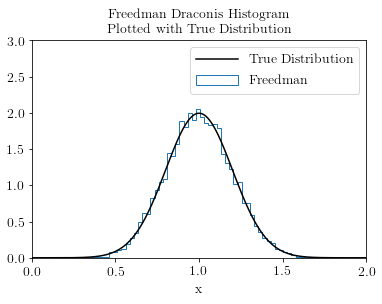

In [17]:
#Problem 2
m=1
std=0.2
N=10000
dist = stats.norm(m,std) 
draws = dist.rvs(N)
# Create a normal distribution with a mean of 1, standard deviation of 0.2, 
# and then place 10 thousand data points on this distribution.

#plot histogram
plt.figure()
fancyhist(draws, bins="freedman", histtype="step", label = 'Freedman',normed = True)

#Overplot the true distribution
x = np.linspace(0,10,N)
plt.plot(x,dist.pdf(x),color = 'k', label = 'True Distribution')
plt.axis([0,2,0,2.2])

#Make it pretty!
plt.title("Freedman Draconis Histogram \nPlotted with True Distribution")
plt.legend(loc='best') 
plt.ylim(0,3)
plt.xlabel("x")

C:\Users\Jacob\Anaconda3\lib\site-packages\astroML\plotting\hist_tools.py:63: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if bins in ['blocks']:
C:\Users\Jacob\Anaconda3\lib\site-packages\astroML\plotting\hist_tools.py:65: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif bins in ['knuth', 'knuths']:
C:\Users\Jacob\Anaconda3\lib\site-packages\astroML\plotting\hist_tools.py:67: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif bins in ['scott', 'scotts']:
C:\Users\Jacob\Anaconda3\lib\site-packages\astroML\plotting\hist_tools.py:69: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif bins in ['freedman', 'freedmans']:


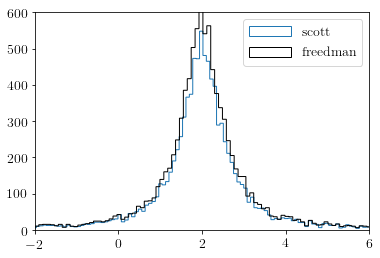

In [66]:
#Problem 3

#Create our distribution, as in 2
dist = stats.norm(1,0.2) 
draws = dist.rvs(10000)

#Add a Cauchy distribution to draws; ie, draws carries both a normal and Cauchy distribution
draws=np.concatenate([stats.cauchy(2,0.5).rvs(int(10000))])

#Construct bins for scott rule, after getting an error using the fancyhist bins="scott" command
binsize = 3.5*0.5/(10000**(1/3)) 
bins = np.append(np.arange(start=draws.min(),stop=draws.max(),step=binsize),np.max(draws))

#figure 1: with Scott's rule bins
plt.figure()
fancyhist(draws, bins=bins, histtype="step", label = 'scott') 
plt.axis([0,4,0,800])

#figure 2: with Freedman's rule bins
fancyhist(draws, bins="freedman", histtype="step", label = 'freedman',color = 'k')
plt.axis([-2,6,0,600])

plt.legend(loc = 'best')

#The two histograms are pretty similar; though it looks to me like Scott's rule is producing bins that are slightly too large.

[-4, 4, 0, 0.8]

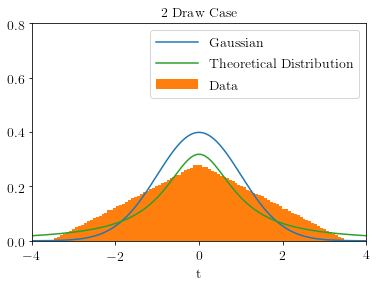

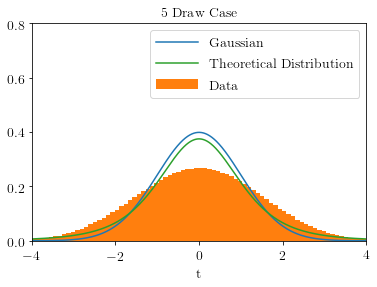

In [70]:
#Problem Four

#Set up some constants that we'll use in both cases
mu=0.0
sigma=1.0
draws=1000000
N1=2
N2=5

#Theoretical PDF, from our noes in BasicStats2
def theoPDF(x,N):
    k=N-1
    return (gamma((k+1)/2))/(np.sqrt(m.pi*k)*gamma(k/2))*(1+((x**2)/k))**(-(k+1)/2) 

#Our normal distribution
u=np.linspace(-4,4,draws)
dist=norm(mu,sigma)

#2 Draw Case

#Create array with the average of each set of random draws
y1 = []
for i in range(draws):
    x = (5*np.random.random(N1)-2.5)
    y1.append(np.average(x)) 

#Normalize array with the square root of 
y1 = np.array(y1)
y1 = y1*np.sqrt(N1)

#And put our plots together! In order, our Gaussan, the histogram of the mean of our draws, and our theoretical distribution
plt.figure()
plt.plot(u,dist.pdf(u),label='Gaussian')
plt.hist(y1,bins=100,density = True,histtype='step',label='Data')
plt.plot(u,theoPDF(u,N1),label='Theoretical Distribution')

#Make it pretty!
plt.title("2 Draw Case")
plt.xlabel("t")
plt.legend(loc='best')
plt.axis([-4,4,0,0.8])

#5 Draw Case

#Create array with the average of each set of random draws
y2 = []
for i in range(draws):
    x = (5*np.random.random(N2)-2.5)
    y2.append(np.average(x)) 

#Normalize array
y2 = np.array(y2)
y2 = y2*np.sqrt(N2)
              
#And put our plots together! In order, our Gaussan, the histogram of the mean of our draws, and our theoretical distribution
plt.figure()
plt.plot(u,dist.pdf(u),label='Gaussian')
plt.hist(y2,bins=100,density = True,histtype='step',label='Data') 
plt.plot(u,theoPDF(u,N2),label='Theoretical Distribution')

#Make it pretty!
plt.title("5 Draw Case")
plt.xlabel("t")
plt.legend(loc='best')
plt.axis([-4,4,0,0.8])

#Something seems wrong here, since I would expect our data to move /closer/ to the Gaussian as N increases 
#(as per the central limit theorem), but the opposite seems to happen. We see the n=2 case as taller, while the 
#n=5 case is shorter and wider. Though this may be my misunderstanding of the theorem, as we /do/ see the distribution 
#moving closer to the Gaussian.